In [1]:
import pickle
file = "BeetleFly_model.pkl"
with open(file, "rb") as f:
    tree = pickle.load(f)

In [9]:
node0 = tree[0].bestmodel.state_dict()
node1 = tree[1].bestmodel.state_dict()

In [27]:
import torch.nn.functional as F
import torch

# normalizing the weights A1 to A4
A1_sm = F.softmax(node0['A1'], dim=1)
A2_sm = F.softmax(node0['A2'], dim=1)
A3_sm = F.softmax(node0['A3'], dim=1)
A4_sm = F.softmax(node0['A4'], dim=1)

A1_sm_1 = F.softmax(node1['A1'], dim=1)
A2_sm_1 = F.softmax(node1['A2'], dim=1)
A3_sm_1 = F.softmax(node1['A3'], dim=1)
A4_sm_1 = F.softmax(node1['A4'], dim=1)

# printing the top 3 weights and indices for A1 to A3
def print_top_weights(A_sm, name):
    flat_A_sm = A_sm.flatten()
    topk = torch.topk(flat_A_sm, 1)
    print(f"Top 3 weights for {name}:")
    for i in range(1):
        print(f"Weight: {topk.values[i].item()}, Index: {topk.indices[i].item()}")
    print()
print_top_weights(A1_sm, "A1_sm_0")
print_top_weights(A2_sm, "A2_sm_0")
print_top_weights(A3_sm, "A3_sm_0")
print(f"A4_sm_0: {A4_sm}\n")
print_top_weights(A1_sm_1, "A1_sm_1")
print_top_weights(A2_sm_1, "A2_sm_1")
print_top_weights(A3_sm_1, "A3_sm_1")
print(f"A4_sm_1: {A4_sm_1}\n")


Top 3 weights for A1_sm_0:
Weight: 0.01894538849592209, Index: 429

Top 3 weights for A2_sm_0:
Weight: 0.01752481982111931, Index: 387

Top 3 weights for A3_sm_0:
Weight: 0.02278335951268673, Index: 456

A4_sm_0: tensor([[0.0745, 0.3411, 0.5844]])

Top 3 weights for A1_sm_1:
Weight: 0.025169575586915016, Index: 415

Top 3 weights for A2_sm_1:
Weight: 0.02932085655629635, Index: 458

Top 3 weights for A3_sm_1:
Weight: 0.027171889320015907, Index: 270

A4_sm_1: tensor([[0.9504, 0.0295, 0.0201]])



In [29]:
thr_raw_0 = node0['b1'] / node0['t1']
thr_fft_0 = node0['b2'] / node0['t2']
thr_der_0 = node0['b3'] / node0['t3']

thr_raw_1 = node1['b1'] / node1['t1']
thr_fft_1 = node1['b2'] / node1['t2']
thr_der_1 = node1['b3'] / node1['t3']

ur_0 = thr_raw_0[:, 429]
us_0 = thr_fft_0[:, 387]
ud_0 = thr_der_0[:, 456]

ur_1 = thr_raw_1[:, 415]
us_1 = thr_fft_1[:, 458]
ud_1 = thr_der_1[:, 270]

In [30]:
print("ud_0:", ud_0)
print("ud_1:", ud_1)
print("ur_0:", ur_0)
print("ur_1:", ur_1)
print("us_0:", us_0)
print("us_1:", us_1)

ud_0: tensor([0.1174])
ud_1: tensor([-0.0863])
ur_0: tensor([0.1111])
ur_1: tensor([-0.2582])
us_0: tensor([0.0412])
us_1: tensor([-0.2394])


In [37]:
from utils.datautils import Readdataset, Splitview, calculate_dataset_metrics
Dataset_name = "BeetleFly"
dataset_path_ = "../UCRArchive_2018/"
Xtrain, ytrain, Xval, yval, Xtest, ytest = Readdataset(dataset_path_, Dataset_name)
N, T = calculate_dataset_metrics(Xtest)
Xraw, Xfft, Xder = Splitview(Xtrain, T)

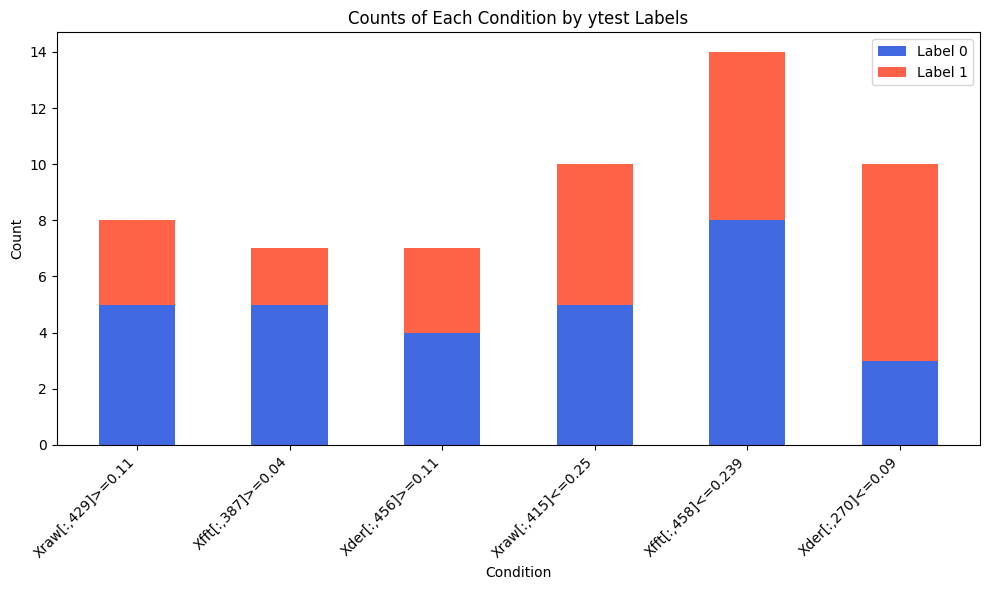

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming Xraw, Xfft, Xder, and ytest are already defined in your workspace.
# Modify these label values if your ytest contains different labels.
label0 = 0
label1 = 1

# Define a list of conditions along with a label for the condition for use in the plot.
conditions = [
    ('Xraw[:,429]>=0.11', Xraw[:,429] >= 0.11),
    ('Xfft[:,387]>=0.04', Xfft[:,387] >= 0.04),
    ('Xder[:,456]>=0.11', Xder[:,456] >= 0.11),
    ('Xraw[:,415]<=0.25', Xraw[:,415] <= 0.25),
    ('Xfft[:,458]<=0.239', Xfft[:,458] <= 0.239),
    ('Xder[:,270]<=0.09', Xder[:,270] <= 0.09)
]

# For each condition, compute the counts for each label in ytest.
counts_label0 = []
counts_label1 = []

for _, cond in conditions:
    counts_label0.append(np.sum(cond & (ytest == label0)))
    counts_label1.append(np.sum(cond & (ytest == label1)))

# Create a stacked bar plot.
x = np.arange(len(conditions))
bar_width = 0.5

plt.figure(figsize=(10, 6))
plt.bar(x, counts_label0, bar_width, color="royalblue", label=f"Label {label0}")
plt.bar(x, counts_label1, bar_width, bottom=counts_label0, color="tomato", label=f"Label {label1}")

plt.xticks(x, [name for name, _ in conditions], rotation=45, ha='right')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Counts of Each Condition by ytest Labels')
plt.legend()
plt.tight_layout()
plt.show()

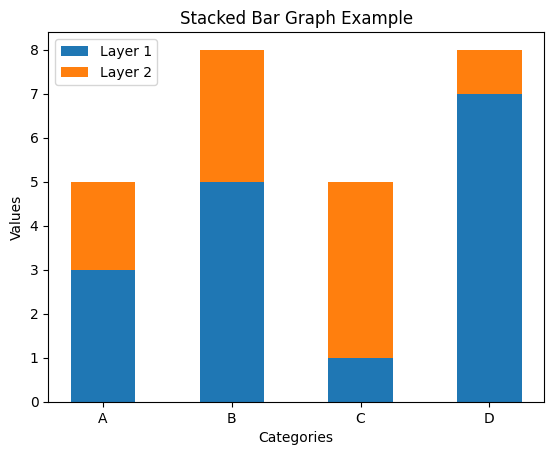

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['A', 'B', 'C', 'D']
bar_width = 0.5
values1 = np.array([3, 5, 1, 7])
values2 = np.array([2, 3, 4, 1])
indices = np.arange(len(categories))

# Create the first set of bars
plt.bar(indices, values1, bar_width, label='Layer 1')

# Create the stacked bars by adding the previous values as the bottom
plt.bar(indices, values2, bar_width, bottom=values1, label='Layer 2')

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Stacked Bar Graph Example')
plt.xticks(indices, categories)
plt.legend()

plt.show()